In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [2]:
xi, k, bw, f0, m, l, t = smp.symbols(r'\xi k \Omega F_0 m l t')

In [3]:
x, f = smp.symbols(r'x f', cls=smp.Function)

In [4]:
# Position
x = x(t)
x_dif = smp.diff(x, t)
x_ddif = smp.diff(x_dif, t)


#Force
f = f(t)
f = f0*smp.sin(bw*t)

In [5]:
w = smp.sqrt(k/m)
c = 2*xi*w*m
eq_struct = smp.Eq(m*x_ddif, -k*(x-l) - c*x_dif + f)

In [6]:
eq_struct

Eq(m*Derivative(x(t), (t, 2)), F_0*sin(\Omega*t) - 2*\xi*m*sqrt(k/m)*Derivative(x(t), t) - k*(-l + x(t)))

In [7]:
sols = smp.solve(eq_struct, x_ddif, simplify=True, rational=False)

In [8]:
sols[0]

(F_0*sin(\Omega*t) - 2*\xi*m*sqrt(k/m)*Derivative(x(t), t) + k*l - k*x(t))/m

In [9]:
dxdt_f = smp.lambdify(x_dif, x_dif, modules=['numpy']) 
dvdt_f = smp.lambdify((m, k, l, xi, x, x_dif, f0, bw, t), sols[0], modules=['numpy'])

In [10]:
def dSdt(S, t):
    x, v = S
    return [
    dxdt_f(v),
    dvdt_f(m, k, l, xi, x, v, f0, bw, t),
    ]

In [11]:
t = np.linspace(0, 40, 1000)

#Parameters of the structure
m = 8.0
w = 2.0
k = np.power(w, 2)*m
l = 10.0
xi = 0.1

#Force parameters
f0 = 20.0
bw = 2.0

#Initial x and v
y0=[10.0, 0]
ans = odeint(dSdt, y0, t=t)

In [12]:
k

32.0

In [13]:
x = ans.T[0]

In [14]:
#Amplitude
A = x-y0[0]

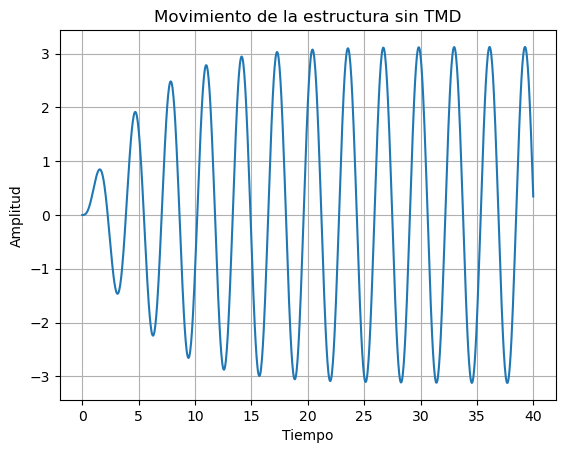

In [16]:
plt.title(f"Movimiento de la estructura sin TMD")
plt.xlabel(f"Tiempo")
plt.ylabel(f"Amplitud")
plt.grid()
plt.plot(t, A)

In [23]:
#Animation (GIF)
def animate(i):
    ax.clear()
    ax.grid()

    # Define the side length for the square boxes
    box_size = 1.5

    # Draw mass 1
    rect1 = plt.Rectangle((x[i] - box_size / 2, 0), box_size, box_size, edgecolor='black', facecolor='red')
    ax.add_patch(rect1)

    # Draw spring 1
    spring1 = plt.Line2D([0, x[i] - box_size], [box_size / 2, box_size / 2], color='grey', linestyle='-', linewidth=2)
    ax.add_line(spring1)


    # Draw the ground
    ax.add_line(plt.Line2D([0, 14], [0, 0], color='black', linestyle='-', linewidth=2))

    ax.set_ylim(-0.5, 2)
    ax.set_xlim(0, 17)
    ax.set_title(f'Time: {t[i]:.2f}s')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('TMD.gif', writer='pillow', fps=25)
